In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's
from wrangle import wrangle_zillow
import explore
import evaluate
import prepare

from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_db_url(url):
    url = f'mysql+pymysql://{user}:{password}@{host}/{url}'
    return url

In [3]:
def mall_data():
    '''
    This function reads the titanic data from the Codeup db into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = """
            
    select *
    from customers"""

    
    df = pd.read_sql(sql_query, get_db_url('mall_customers'))
    return df

In [4]:
df = mall_data()

In [5]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
cols = ['age', 'annual_income', 'spending_score']

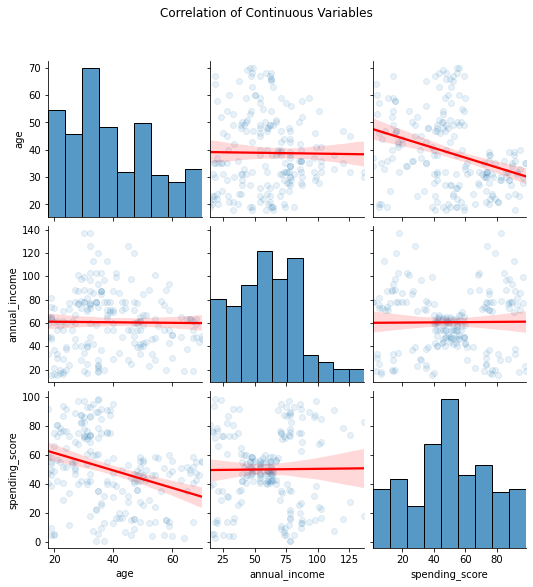

In [7]:
explore.plot_variable_pairs(df, cols, descriptive=None, hue=None)

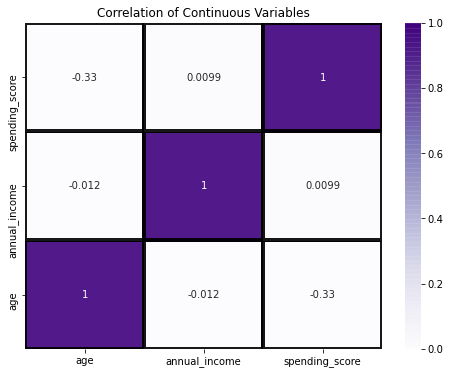

In [8]:
explore.create_heatmap(df, cols)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.spending_score.mean()

50.2

In [20]:
df['big_spender'] = np.where(df.spending_score > 80, "True", "False")

In [21]:
cats = ["big_spender"]

In [22]:
cols = ['age', 'annual_income']

In [23]:
df.head()

,customer_id,gender,age,annual_income,spending_score,big_spender
0,1,Male,19,15,39,False
1,2,Male,21,15,81,True
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


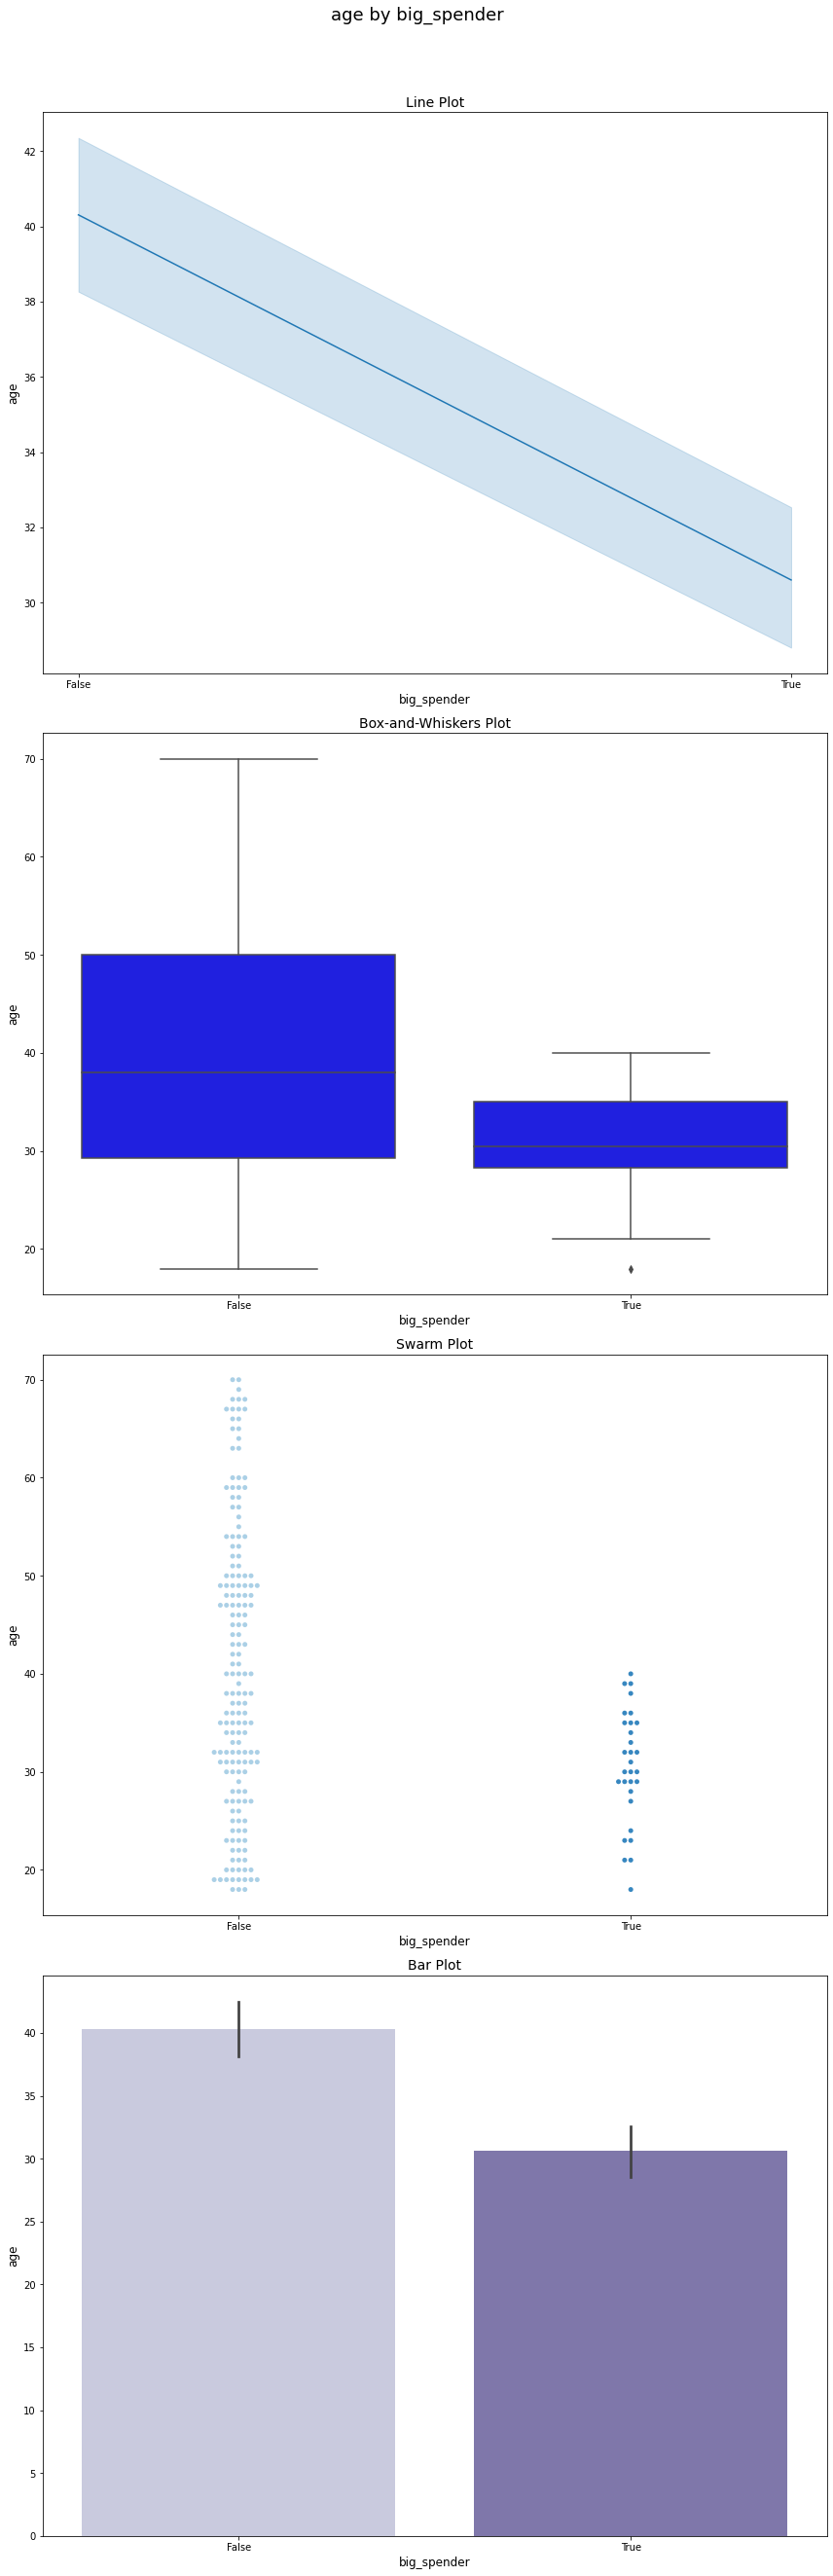

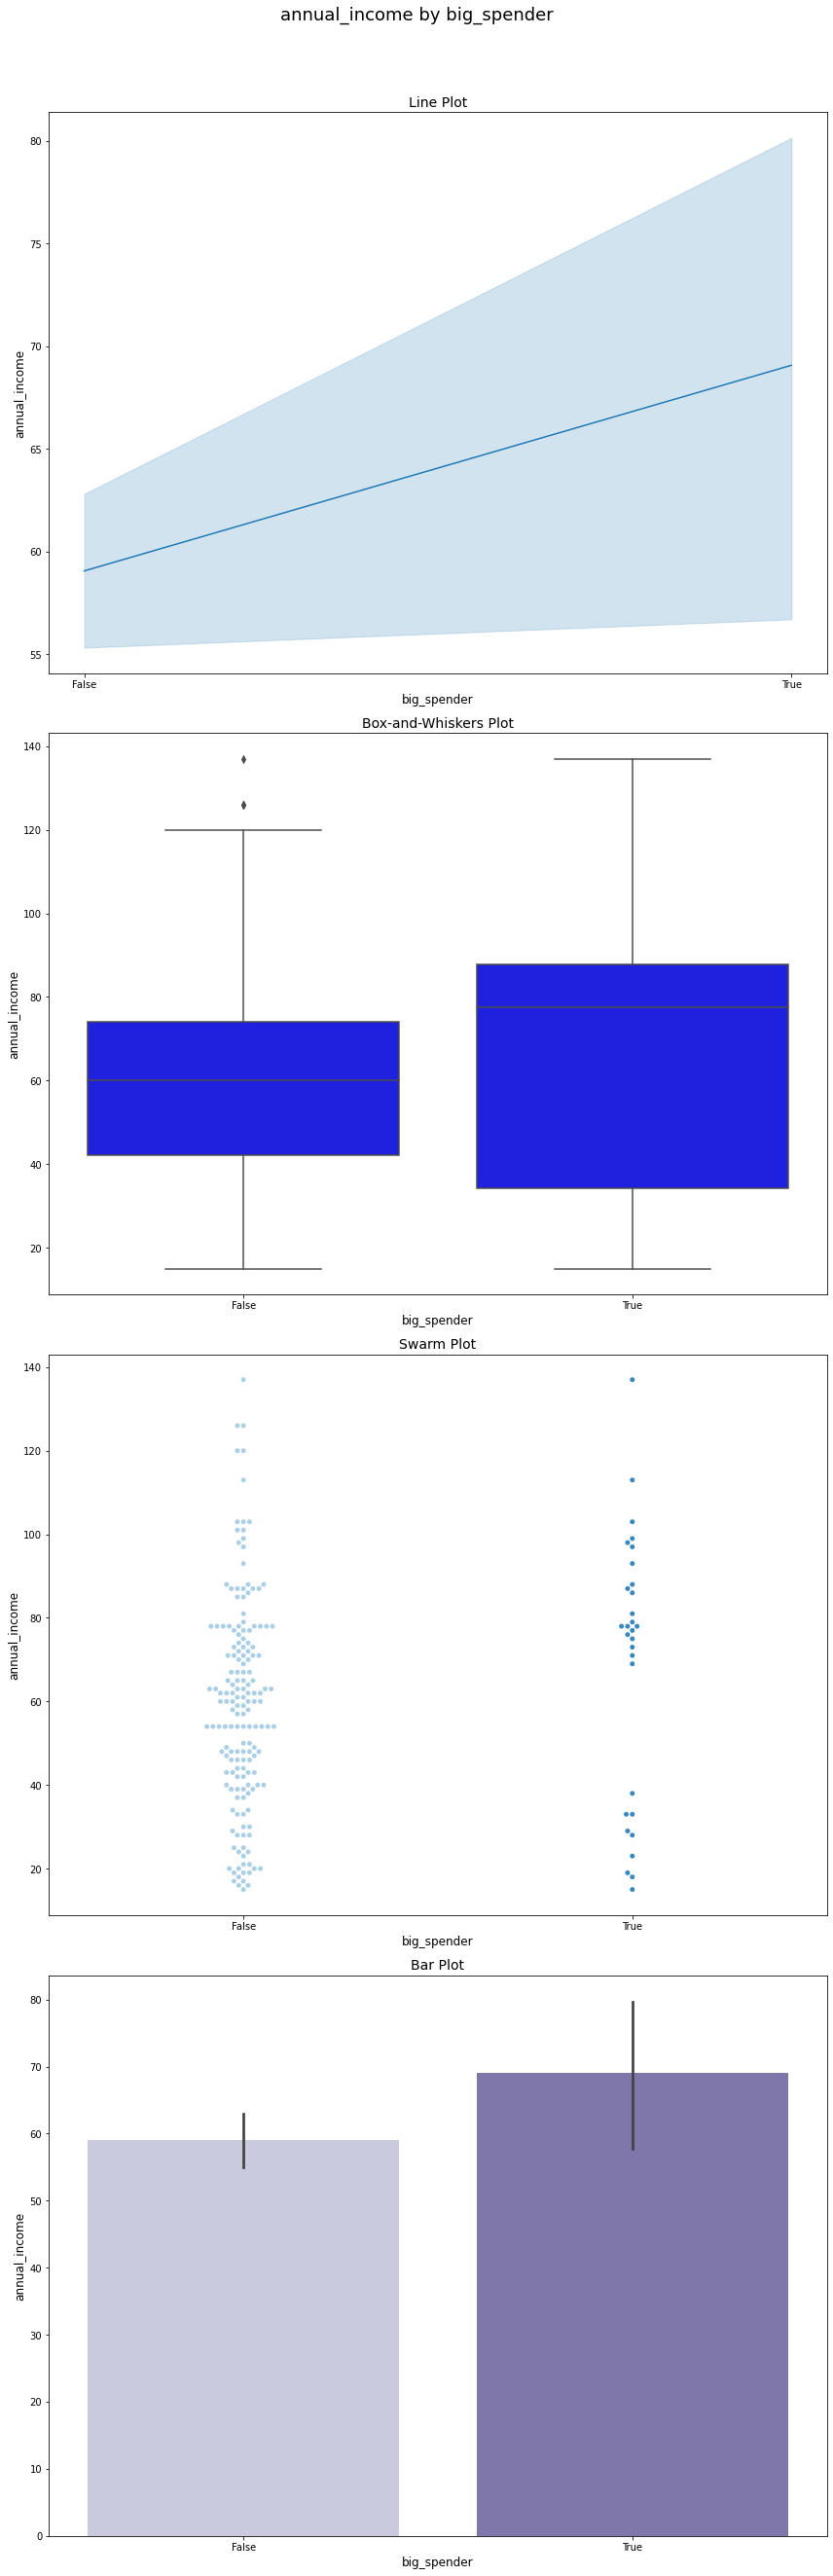

In [24]:
explore.plot_categorical_and_continuous_vars(cats, cols, df)